In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 
import seaborn as sns
import japanize_matplotlib

In [2]:
d = pd.read_csv('C:/Users/tanak/OneDrive/ドキュメント/pokemon_for_stats.csv').iloc[:,1:]
gen = ["第1世代"]*151+["第2世代"]*100+["第3世代"]*135+["第4世代"]*107+["第5世代"]*156+["第6世代"]*72+["第7世代"]*88+["第8世代"]*89
d['世代'] = gen

num_cols = ['重さ','高さ','HP','攻撃','防御','特攻','特防','素早さ','合計']
d

,No.,ポケモン,タイプ1,タイプ2,重さ,高さ,HP,攻撃,防御,特攻,特防,素早さ,合計,世代
0,1,フシギダネ,くさ,どく,6.9,0.7,45,49,49,65,65,45,318,第1世代
1,2,フシギソウ,くさ,どく,13.0,1.0,60,62,63,80,80,60,405,第1世代
2,3,フシギバナ,くさ,どく,100.0,2.0,80,82,83,100,100,80,525,第1世代
3,4,ヒトカゲ,ほのお,NaN,8.5,0.6,39,52,43,60,50,65,309,第1世代
4,5,リザード,ほのお,NaN,19.0,1.1,58,64,58,80,65,80,405,第1世代
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,894,レジエレキ,でんき,NaN,145.0,1.2,80,100,50,100,50,200,580,第8世代
894,895,レジドラゴ,ドラゴン,NaN,200.0,2.1,200,100,50,100,50,80,580,第8世代
895,896,ブリザポス,こおり,NaN,800.0,2.2,100,145,130,65,110,30,580,第8世代
896,897,レイスポス,ゴースト,NaN,44.5,2.0,100,65,60,145,80,130,580,第8世代


多次元データの統計学は、多くの変数を一括してその間の関係を扱うものであり、1次元データ分析を繰り返すことではない。
簡単のため$p=2$で、2変数$x,y$を考えてみる。
$x$と$y$の間に区別を設けず対等に見る方法を相関、$x$から$y$を見るとき回帰という。
#### 散布図と分割表
観測対象$i(i=1,\cdots,n)$から、1組のデータ$(x_i,y_i)$が得られ、それらが両方とも量的データである場合、横軸に$x$、縦軸に$y$をとって、各観測対象を平面上にプロットした図を散布図と呼ぶ。

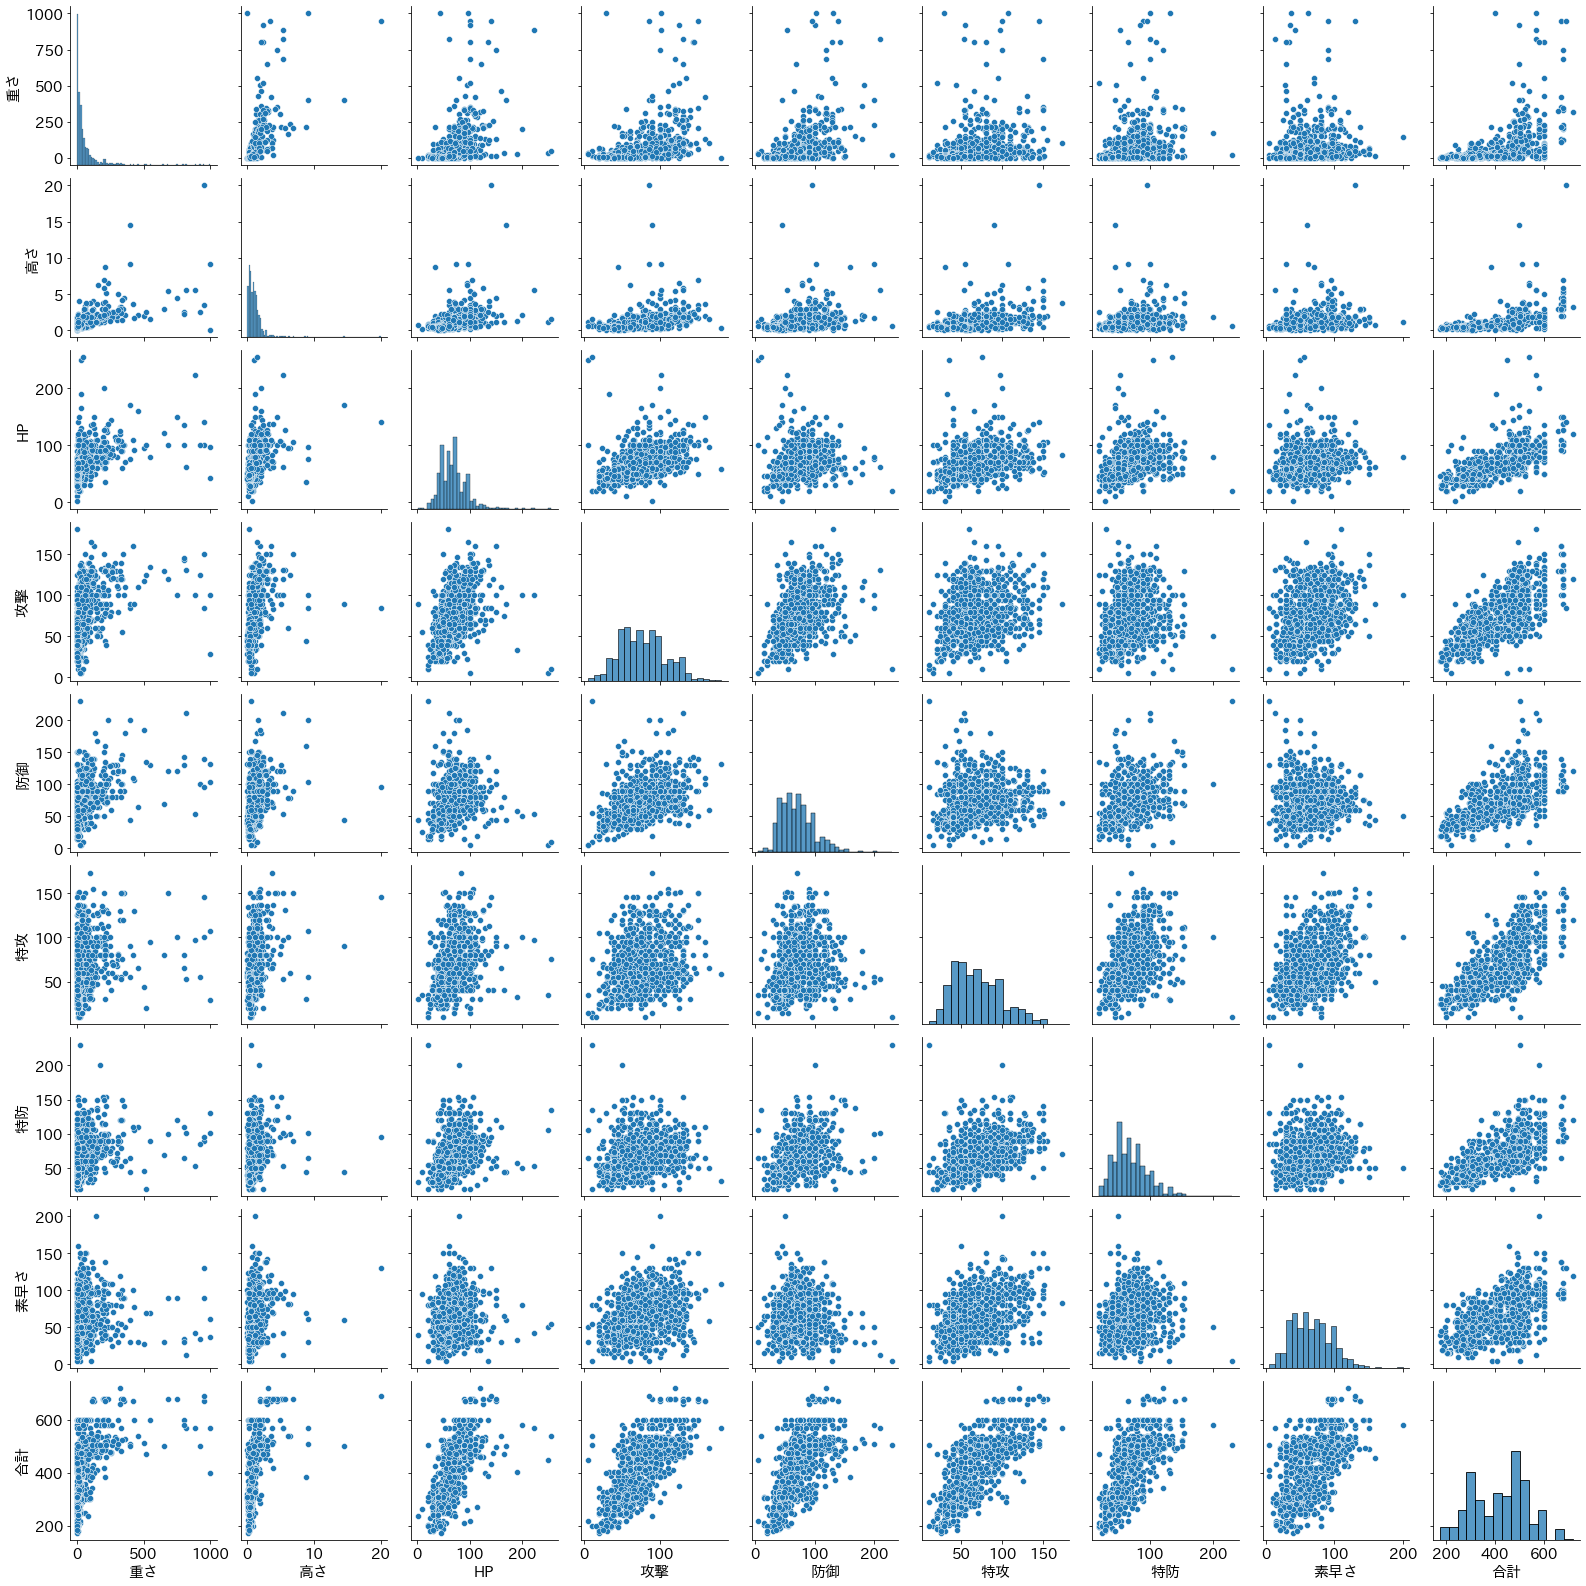

In [3]:
plt.rcParams['font.size'] = 15
sns.pairplot(d[num_cols])

二つの変数間の関係のことを、一般に相関関係と呼ぶが、統計学では直線関係に近い傾向が見られるときに「相関関係がある」ということが多い。
一方の変数の増加につれて他方の変数も増加する傾向を「正の相関関係がある」といい、
逆に一方の変数の増加が他方の変数の減少に対応している場合を「負の相関関係がある」という。
  
片方、または両方が質的データである場合は分割表と呼ばれる手法を用いる。

In [7]:
pd.crosstab(d['タイプ1'], d['世代'])

世代,第1世代,第2世代,第3世代,第4世代,第5世代,第6世代,第7世代,第8世代
タイプ1,,,,,,,,
あく,0,5,4,3,13,3,1,7
いわ,9,4,8,6,6,8,5,4
かくとう,7,2,4,2,7,3,4,7
くさ,12,9,12,13,15,5,12,8
こおり,2,4,6,3,6,2,0,5
じめん,8,3,6,4,8,0,2,3
でんき,9,6,4,7,8,3,4,9
どく,14,1,3,6,2,2,6,1
はがね,0,2,9,3,4,4,4,4


In [5]:
d.groupby(['世代'])[num_cols].mean()

,重さ,高さ,HP,攻撃,防御,特攻,特防,素早さ,合計
世代,,,,,,,,,
第1世代,45.951656,1.194702,64.211921,72.913907,68.225166,67.139073,66.086093,69.066225,407.642384
第2世代,49.105000,1.163000,70.980000,68.260000,69.690000,64.500000,72.340000,61.410000,407.180000
第3世代,67.077778,1.229630,65.666667,73.111111,69.007407,67.859259,66.466667,61.614815,403.725926
第4世代,76.885047,1.133645,73.102804,80.214953,75.205607,73.280374,74.476636,69.476636,445.757009
第5世代,52.402564,1.032051,70.314103,81.032051,71.237179,69.243590,67.333333,66.596154,425.756410
第6世代,51.401389,1.068056,68.916667,72.500000,75.222222,72.541667,74.722222,65.680556,429.583333
第7世代,109.661364,1.351136,71.011364,84.772727,78.727273,74.954545,74.568182,65.375000,449.409091
第8世代,76.267416,1.395506,71.112360,80.078652,72.730337,71.494382,69.191011,67.752809,432.359551


In [6]:
d.groupby(['タイプ1'])[num_cols].mean()

,重さ,高さ,HP,攻撃,防御,特攻,特防,素早さ,合計
タイプ1,,,,,,,,,
あく,61.877778,1.263889,72.694444,84.361111,66.305556,71.111111,67.583333,74.277778,436.333333
いわ,120.026000,1.386000,67.120000,87.120000,98.960000,59.740000,73.260000,53.140000,439.340000
かくとう,61.502778,1.266667,72.194444,99.944444,70.305556,52.833333,65.361111,66.777778,427.416667
くさ,32.661628,0.920930,65.558140,72.767442,70.616279,71.918605,68.779070,58.279070,407.918605
こおり,120.285714,1.232143,71.892857,73.071429,73.714286,76.821429,77.535714,59.214286,432.250000
じめん,126.485294,1.370588,71.029412,93.441176,85.176471,50.617647,61.882353,60.558824,422.705882
でんき,42.298000,0.990000,63.320000,73.740000,62.060000,84.220000,67.880000,84.100000,435.320000
どく,62.191429,1.745714,67.971429,73.028571,70.742857,66.142857,66.628571,67.942857,412.457143
はがね,205.273333,1.816667,70.600000,88.566667,112.866667,68.666667,76.366667,53.033333,470.100000


分割表で二つのデータの関係を見るには、相対度数を用いる。
相対度数は縦・横・全体に対して3種類できる。どれを用いるかは分析の目的による。

In [6]:
d_agg = pd.crosstab(d['タイプ1'], d['世代'])
print('横方向の相対度数')
display((d_agg.T / d_agg.sum(axis=1)).T)
print('縦方向の相対度数')
display(d_agg / d_agg.sum(axis=0))
print('データ全体の大きさに対する相対度数')
display(d_agg / d_agg.sum())

横方向の相対度数


世代,第1世代,第2世代,第3世代,第4世代,第5世代,第6世代,第7世代,第8世代
タイプ1,,,,,,,,
あく,0.000000,0.138889,0.111111,0.083333,0.361111,0.083333,0.027778,0.194444
いわ,0.180000,0.080000,0.160000,0.120000,0.120000,0.160000,0.100000,0.080000
かくとう,0.194444,0.055556,0.111111,0.055556,0.194444,0.083333,0.111111,0.194444
くさ,0.139535,0.104651,0.139535,0.151163,0.174419,0.058140,0.139535,0.093023
こおり,0.071429,0.142857,0.214286,0.107143,0.214286,0.071429,0.000000,0.178571
じめん,0.235294,0.088235,0.176471,0.117647,0.235294,0.000000,0.058824,0.088235
でんき,0.180000,0.120000,0.080000,0.140000,0.160000,0.060000,0.080000,0.180000
どく,0.400000,0.028571,0.085714,0.171429,0.057143,0.057143,0.171429,0.028571
はがね,0.000000,0.066667,0.300000,0.100000,0.133333,0.133333,0.133333,0.133333


縦方向の相対度数


世代,第1世代,第2世代,第3世代,第4世代,第5世代,第6世代,第7世代,第8世代
タイプ1,,,,,,,,
あく,0.000000,0.05,0.029630,0.028037,0.083333,0.041667,0.011364,0.078652
いわ,0.059603,0.04,0.059259,0.056075,0.038462,0.111111,0.056818,0.044944
かくとう,0.046358,0.02,0.029630,0.018692,0.044872,0.041667,0.045455,0.078652
くさ,0.079470,0.09,0.088889,0.121495,0.096154,0.069444,0.136364,0.089888
こおり,0.013245,0.04,0.044444,0.028037,0.038462,0.027778,0.000000,0.056180
じめん,0.052980,0.03,0.044444,0.037383,0.051282,0.000000,0.022727,0.033708
でんき,0.059603,0.06,0.029630,0.065421,0.051282,0.041667,0.045455,0.101124
どく,0.092715,0.01,0.022222,0.056075,0.012821,0.027778,0.068182,0.011236
はがね,0.000000,0.02,0.066667,0.028037,0.025641,0.055556,0.045455,0.044944


データ全体の大きさに対する相対度数


世代,第1世代,第2世代,第3世代,第4世代,第5世代,第6世代,第7世代,第8世代
タイプ1,,,,,,,,
あく,0.000000,0.05,0.029630,0.028037,0.083333,0.041667,0.011364,0.078652
いわ,0.059603,0.04,0.059259,0.056075,0.038462,0.111111,0.056818,0.044944
かくとう,0.046358,0.02,0.029630,0.018692,0.044872,0.041667,0.045455,0.078652
くさ,0.079470,0.09,0.088889,0.121495,0.096154,0.069444,0.136364,0.089888
こおり,0.013245,0.04,0.044444,0.028037,0.038462,0.027778,0.000000,0.056180
じめん,0.052980,0.03,0.044444,0.037383,0.051282,0.000000,0.022727,0.033708
でんき,0.059603,0.06,0.029630,0.065421,0.051282,0.041667,0.045455,0.101124
どく,0.092715,0.01,0.022222,0.056075,0.012821,0.027778,0.068182,0.011236
はがね,0.000000,0.02,0.066667,0.028037,0.025641,0.055556,0.045455,0.044944


#### 相関係数
「攻撃」に対する「防御」「素早さ」「特攻」の散布図を示す。

Text(0, 0.5, '特攻')

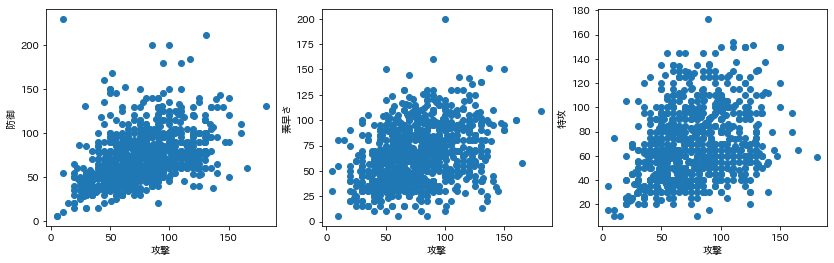

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(14,4))

axes[0].scatter(d['攻撃'],d['防御'])
axes[0].set_xlabel('攻撃')
axes[0].set_ylabel('防御')

axes[1].scatter(d['攻撃'],d['素早さ'])
axes[1].set_xlabel('攻撃')
axes[1].set_ylabel('素早さ')

axes[2].scatter(d['攻撃'],d['特攻'])
axes[2].set_xlabel('攻撃')
axes[2].set_ylabel('特攻')

「防御」「素早さ」「特攻」の順に関係がなくなっていくように見える。
このようなときは相関係数を計算して比較すればよい。
もっともよく用いられるものは、ピアソンの積率相関係数であり、単に相関係数というときはこれを指す。
データが$(x_1,y_1),(x_2,y_2),\cdots,(x_n,y_n)$で与えられた場合、変数$x$と$y$の間の相関係数は
$$
r_{xy}=\frac{\sum (x_i-\bar{x})(y_i-\bar{y})/n}{\sqrt{\sum(x_i-\bar{x})^2/n}\sqrt{\sum(y_i-\bar{y})^2/n}}
=\frac{\sum (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum(x_i-\bar{x})^2}\sqrt{\sum(y_i-\bar{y})^2}}
$$
で定義される。相関係数は常に$-1\leq r_{xy}\leq 1$である。
分母の$\sqrt{\sum(x_i-\bar{x})^2/n}$と$\sqrt{\sum(y_i-\bar{y})^2/n}$は、変数$x,y$のそれぞれの標準偏差$S_x,S_y$である。
分子の$C_{xy}=\sum (x_i-\bar{x})(y_i-\bar{y})/n$は共分散と呼ぶ。

In [9]:
def calc_r(x, y):
    dx = x - np.mean(x)
    dy = y - np.mean(y)
    
    result = np.sum(dx*dy)/(np.sqrt(np.sum(dx**2))*np.sqrt(np.sum(dy**2)))
    return result

In [11]:
def calc_r(x, y):
    dx = x - np.mean(x)
    dy = y - np.mean(y)
    
    result = np.sum(dx*dy)/(np.sqrt(np.sum(dx**2))*np.sqrt(np.sum(dy**2)))
    return result

print('攻撃-防御 ', calc_r(d['攻撃'],d['防御']))
print('攻撃-素早さ ', calc_r(d['攻撃'],d['素早さ']))
print('攻撃-特攻 ', calc_r(d['攻撃'],d['特攻']))

攻撃-防御  0.45443082983760247
攻撃-素早さ  0.3374489049359815
攻撃-特攻  0.3196123813673278


In [37]:
from scipy.stats import pearsonr

pearsonr(d['攻撃'],d['防御'])

(0.4544308298376027, 5.775292721219386e-47)

<AxesSubplot:>

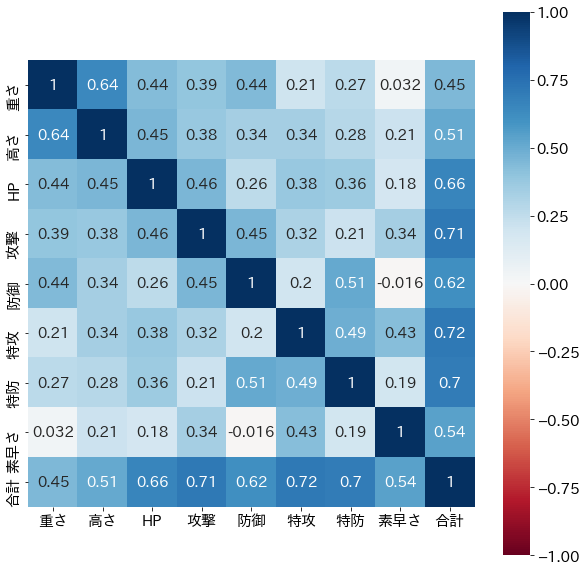

In [21]:
R = np.corrcoef(d[num_cols].T)
plt.figure(figsize=(10,10))
sns.heatmap(R, annot=True, square=True, xticklabels=num_cols, yticklabels=num_cols, vmin=-1, vmax=1, cmap='RdBu')

相関係数が最大、最小である$±1$をとるのは、各$(x_i,y_i)$の関係が、
$$
y_i=±\frac{S_x}{S_y}(x_i-\bar{x})+\bar{y}\ (i=1,\cdots,n)
$$
の時に限られる。
    書き換えると$y_i=bx_i+a\ (b=±S_x/S_y,a=\bar{y}-\bar{x}S_x/S_y)$のときであり、すべてのデータが直線$y=bx+a$上にあるとき、相関係数は1または-1となる。
これを正の完全相関($r_{xy}=1,b>0$)、または負の完全相関($r_{xy}=-1,b<0$)という。

一般的には強い相関関係があるからといって、必ずしもその二つのデータの間に因果関係があるということではない。

#### みかけ上の相関と偏相関係数
2つの事象に因果関係がないのに、共通の要因の影響などにより相関関係があるように見えてしまうことを見かけ上の相関と呼ぶ。
共通の要因(変数3)の影響を除いた後の、変数1と変数2の相関係数は偏相関係数と呼ばれ、次のように計算される。

$$
r_{12・3}=\frac{r_{12} - r_{13}r_{23}}{\sqrt{1-r_{13}^2}\sqrt{1-r_{23}^2}}
$$

In [24]:
def calc_pr(x, y, z):
    r12 = calc_r(x, y)
    r13 = calc_r(x, z)
    r23 = calc_r(y, z)
    
    return (r12 - r13*r23) /(np.sqrt(1-r13**2)*np.sqrt(1-r23**2))

calc_pr(d.重さ, d.高さ, d.HP)

0.5546807100645829

#### 順位相関係数
2つの質的基準がある場合に、観測対象$i$の、2つの基準による順位$R_i$,$r_i'$の間の相関を示す指標である。
順位相関係数は、スピアマンによる定義のものと、ケンドールの定義によるものがしばしば用いられる。
スピアマンの順位相関係数$r_s$は、$R$と$R'$に通常の積率相関係数の式を適用したもので、
$$
r_s=1-\frac{2}{n^3-n}\sum_{i=1}^n(R_i-R_i')^2
$$

これに対しケンドールの順位相関係数$r_K$は、観測対象の対$(i,j)$を考え、次のようにカウントする。
正順、すなわち$R_i>R_j,R_i'>R_j'$あるいは$r_i<R_j,R_i'<R_j'$の場合には$+1$、
逆順、すなわち$R_i>R_j,R_i'<R_j'$あるいは$r_i<R_j,R_i'>R_j'$の場合には$-1$の値を与え、
$+1$を与えた対の数$G$と$-1$を与えた対の数$H$の大小関係をみる。  
$$
r_K=\frac{G-H}{n(n-1)/2}
$$
で定義する。

In [33]:
d_rank = d[['タイプ1','攻撃','防御']].groupby(['タイプ1']).mean().rank(ascending=False)
d_rank

,攻撃,防御
タイプ1,,
あく,6.0,14.0
いわ,5.0,2.0
かくとう,1.0,10.0
くさ,12.0,9.0
こおり,10.0,6.0
じめん,3.0,3.0
でんき,9.0,17.0
どく,11.0,7.0
はがね,4.0,1.0


In [36]:
from scipy.stats import spearmanr

correlation, pvalue = spearmanr(d_rank['攻撃'], d_rank['防御'])
correlation

0.32094943240454077

In [39]:
from scipy.stats import kendalltau

correlation, pvalue = kendalltau(d_rank['攻撃'], d_rank['防御'])
correlation

0.21568627450980396

#### 直線および平面のあてはめ
最小二乗法によるあてはめを考える。説明変数$x_i$から予想される従属変数$y$の値$bx_i+a$と現実の値$y_i$が、最も小さい隔たりを持つのが、最適な直線$y=bx+a$の引き方である。
従って、二乗和
$$
L=\sum_{i=1}^n\{y_i-(bx_i+a)\}^2
$$
を最小にする$a,b$を求める。
$a,b$でそれぞれ偏微分して0と置くと、
$$
na+(\sum x_i)b=\sum y_i\\
(\sum x_i)a+(\sum x_i^2)b=\sum x_iy_i
$$
となる。これを正規方程式と呼ぶ。
これを$a,b$について解くと
$$
b=\frac{\sum x_iy_i-n\bar{x}\bar{y}}{\sum x_i^2-n\bar{x}^2}\\
a=\bar{y}-b\bar{x}
$$
のように得られる。得られた$a,b$による1次式を$y$の$x$への回帰方程式(回帰直線)と呼ぶ。

In [43]:
x = d['高さ']
y = d['重さ']
n = len(x)

x_mean  = np.mean(x)
y_mean  = np.mean(y)

b = (np.sum(x*y)-n*x_mean*y_mean) / (np.sum(x**2) - n * x_mean**2)
a = y_mean - b * x_mean
print('傾きb: ', b)
print('切片a: ', a)

傾きb:  62.19271304253602
切片a:  -9.788573931292724


「高さ」が1 m 高くなると「重さ」は62.2 kg増加する傾向があるとわかる。
$b$が
$$
b=\frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sum(x_i-\bar{x})^2}
$$
とも表されることから、
$$
b=r\frac{S_y}{S_x}
$$
という関係が成り立つことがわかる。
相関係数$r$は直線のあてはまりの良さの尺度でもある。
回帰直線による$y$のあてはめ値$\hat{y}_i=bx_i+a$は一般に実際に観測された$y_i$と一致せず、その外れの二乗$\sum d_i^2$について
$$
\sum d_i^2=\sum(y_i-\hat{y}_i)^2=(1-r^2)\sum(y_i-\bar{y})^2
$$
が成り立つ。
$r^2$が1に近いほど$y_iは\hat{y}_i$に近づき、$r^2=1$なら正確に$yy_i=bx_i+a$が成り立ち、$y$は$x$から完全に決定される。
したがって、$r^2$はx$から$y$を決定する強弱の度合いを表し、$r^2$を決定係数と呼ぶ。

$$
SS_0=\sum(y_i-\bar{y})\\
SS_E=\sum(y_i-\hat{y})\\
$$
とおくと、$S_0$は被説明変数$y$のばらつき、$SS_E$は回帰をした後のばらつきであるが、
$$
SS_E=(1-r^2)SS_0
$$
であるから、$y$のばらつきは$SS_0$から$SS_E$へちょうそ割合$r^2 %$で減少したことになる。
減少高を
$$
SS_R=SS_0-SS_E
$$
とおくと、
$$
SS_R=r^2SS_0
$$
となり、$r^2$が大きいほど回帰の効果も大きいこととなる。

<AxesSubplot:>

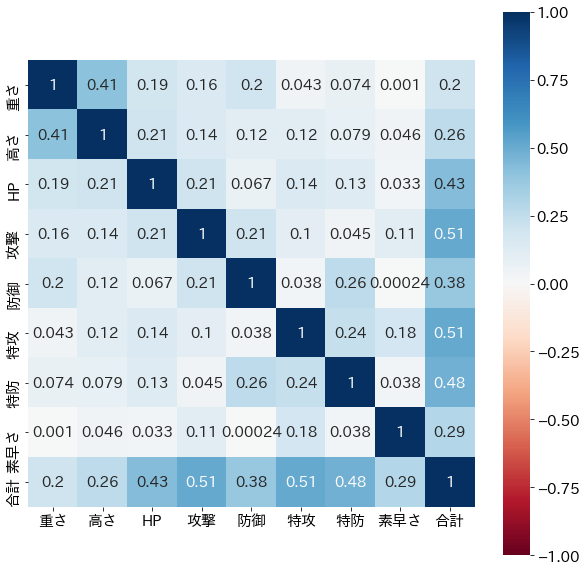

In [50]:
R2 = R**2
plt.figure(figsize=(10,10))
sns.heatmap(R2, annot=True, square=True, xticklabels=num_cols, yticklabels=num_cols, vmin=-1, vmax=1, cmap='RdBu')

説明変数が二つ以上の場合、重回帰と呼ぶ。$p=2$の場合は、
$$
y=b_1x_1+b_2x_2+a
$$
となるが、これは3次元空間における平面のあてはめの問題となる。